In [2]:
# Importation de library : 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
exercice = pd.read_csv('exercise.csv')

calories = pd.read_csv('calories.csv')

In [8]:
print(exercice.head(2))
print(calories.head())

    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
    User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0


In [10]:
print(calories.info())
print(exercice.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User_ID   15000 non-null  int64  
 1   Calories  15000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 234.5 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 937.6+ KB
None


In [12]:
print(calories.shape)
print(exercice.shape)

(15000, 2)
(15000, 8)


In [13]:
# Lets merge both the datasets on user_id column
df = pd.merge(exercice, calories, on = 'User_ID')

In [14]:
df.shape

(15000, 9)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.1+ MB


In [16]:
# If you are wondering about why this intercept column with value 1 is added, just be patinet
df['Intercept'] = 1

# Visualizing our Data
As it is obvious that if we workout more then we will loose more calories.


Text(0.5, 1.0, 'Calories burned vs duration of exercise')

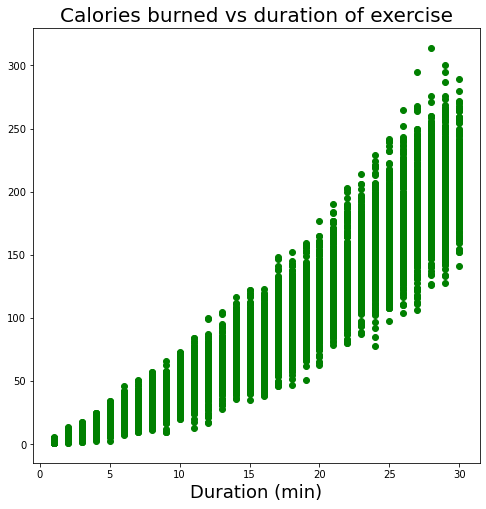

In [17]:
# Visualizing the effect of exercise minutes on calories burned.
plt.figure(figsize=(8,8))
plt.plot(df['Duration'], df['Calories'], 'go')
plt.xlabel('Duration (min)', size = 18)
plt.title('Calories burned vs duration of exercise', size = 20)

Now let's create the feature and response variable

In [19]:
X = df.loc[:,['Intercept', 'Duration']]
y = df.loc[:,'Calories']
import numpy as np


In [21]:
# First implementing the linear regression without using any libraries
def linear_regression(X,y):
    _coeffs = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), y)
    return _coeffs

by_hand_coefs = linear_regression(X.values, y.values)

print('Intercept without using library:', by_hand_coefs[0])
print('Slop without using library', by_hand_coefs[1])


Intercept without using library: -21.859656399672428
Slop without using library 7.172883837907465


### still wondering about the intercept column, see this formula for the explanation.
Y = XB + E

Text(0.5, 1.0, 'Calories burned vs duration of exercise')

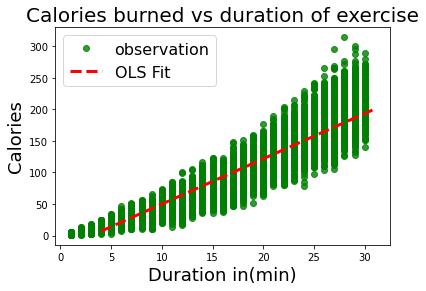

In [23]:
xs = np.linspace(4, 31, 1000)
ys = by_hand_coefs[0] + by_hand_coefs[1] * xs
plt.plot(df['Duration'], df['Calories'], 'go', label = 'observation', alpha = 0.8)
plt.xlabel("Duration in(min)", size = 18) 
plt.ylabel('Calories', size = 18)
plt.plot(xs, ys, 'r--', label = 'OLS Fit', linewidth = 3)
plt.legend(prop = {'size': 16})
plt.title('Calories burned vs duration of exercise', size = 20)

In [24]:
# Lets predict something
print(f'Exercising for 35.5 minutes will burn an estimated \ {np.round((by_hand_coefs[0] + by_hand_coefs[1] * 35.5), 2)} calories')

Exercising for 35.5 minutes will burn an estimated \ 232.78 calories


## Implementing linear regression with the help of the library.


In [25]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(np.array(X.Duration).reshape(-1, 1), y)
print('Intercept using library : ', linear_regression.intercept_)
print('Slop using library:', linear_regression.coef_[0])

Intercept using library :  -21.859656399672403
Slop using library: 7.172883837907469
